In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from fluxo.dados import Dados
from fluxo.carga_dados import CargaDados
from fluxo.classificador_segmentos import ClassificadorSegmentos

In [2]:
pd.set_option('max_colwidth', 180)

In [3]:
# Definição do tipo de ato
# Valores válidos: 'ADE', 'SC' ou 'Port.'
# O valor desta variável influencia todo o comportamento deste notebook
tipo_ato = 'Port.'

## Carga de dados desconhecidos ao modelo treinado

In [4]:
dados = Dados()
cg = CargaDados(path_dados_seg='./dados/extracao-segmentos-atos-2021.csv')
cg.executar(dados)

11:05:45 - Carregando dados de segmentos...
11:05:45 - 12013 registros carregados.


## Execução do pipeline de NLP

In [5]:
clf_seg = ClassificadorSegmentos()

11:05:45 - Carregando modelo treinado para o tipo ADE...
11:05:45 - Carregando modelo treinado para o tipo SC...
11:05:45 - Carregando modelo treinado para o tipo Port....
11:05:45 - Carregando vetorizador treinado para o tipo ADE...
11:05:46 - Carregando vetorizador treinado para o tipo SC...
11:05:46 - Carregando vetorizador treinado para o tipo Port....


In [6]:
df_predicao = clf_seg.classificar_segmentos(tipo_ato, dados)

11:05:46 - (Re)Carregando segmentos originais...
11:05:46 - Removendo segmentos nulos...
11:05:46 - 15 segmentos nulos excluídos.
11:05:46 - Restaram 11998 segmentos não nulos.
11:05:46 - Removendo todos os segmentos do tipo Anexo...
11:05:46 - 302 segmentos do tipo Anexo excluídos.
11:05:46 - Determinando tipos de segmento (labels) para atos do tipo Port....
11:05:46 - Tipos de segmento para atos Port.: ['Ementa', 'Fecho', 'Não Identificado']
11:05:46 - Excluindo segmentos dos atos que não são Port....
11:05:46 - 7380 segmentos de atos não Port. excluídos.
11:05:46 - Restaram 4316 segmentos de atos Port..
11:05:46 - Removendo segmentos não representativos para o tipo Port....
11:05:46 - 256 segmentos não representativos excluídos.
11:05:46 - Restaram 4060 segmentos representativos.
11:05:46 - Removendo tags HTML...
11:05:46 - Removendo caracteres de escape HTML...
11:05:46 - Reclassificando segmentos não identificados...
/home/91872936504/devx/saan/.env/lib/python3.6/site-packages/pan

### Cálculo das métricas de desempenho do modelo

In [7]:
metricas = dict()
metricas['acuracia'] = round(accuracy_score(df_predicao['tipo_seg'], df_predicao['tipo_seg_pred']),4)
metricas['precisao'] = round(precision_score(df_predicao['tipo_seg'], df_predicao['tipo_seg_pred'], pos_label=1, average='macro'),4)
metricas['revocacao'] = round(recall_score(df_predicao['tipo_seg'], df_predicao['tipo_seg_pred'], pos_label=1, average='macro'), 4)
metricas['f1'] = round(f1_score(df_predicao['tipo_seg'], df_predicao['tipo_seg_pred'], pos_label=1, average='macro'),4)
metricas

{'acuracia': 0.9463, 'precisao': 0.9164, 'revocacao': 0.9421, 'f1': 0.9229}

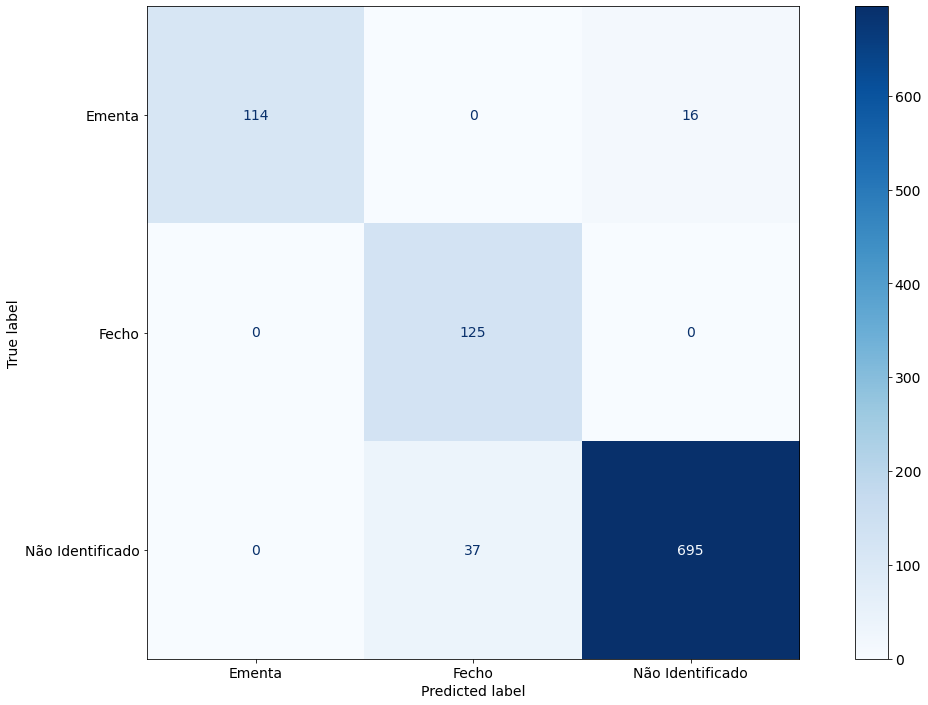

In [8]:
matriz_confusao = confusion_matrix(df_predicao['tipo_seg'], df_predicao['tipo_seg_pred'], labels=dados.labels)
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(20,12))
        
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=dados.labels)
disp.plot(cmap='Blues', ax=ax)